In [1]:
import networkx_utils as xu
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
G = xu.unpickle_graph("./autoproofread_25k.pkl")

# Examples of Applications of Module

In [3]:
# Getting the nodes
node_names = np.array(G.nodes())
node_names.shape

#getting the edges
graph_edges = np.array(list(G.edges()))
graph_edges.shape

(1003948, 2)

In [4]:
#getting the neighbors
ex_node = node_names[0]
xu.get_neighbors(G,ex_node)

#getting nodes with a certain degree
xu.get_nodes_of_degree_k(G,1)
xu.get_nodes_greater_or_equal_degree_k(G,10)
xu.get_nodes_less_or_equal_degree_k(G,20)

[864691136286544067,
 864691136208983740,
 864691136822194660,
 864691135581608557,
 864691136819523950,
 864691135213062712,
 864691136951620319,
 864691135403777774,
 864691136175034630,
 864691137196908353,
 864691135493587140,
 864691136388283511,
 864691135210057664,
 864691135272164625,
 864691135162248749,
 864691135583696248,
 864691136031768251,
 864691136262136548,
 864691135776616032,
 864691135909764009,
 864691136289008535,
 864691136119602513,
 864691135563147716,
 864691135472012082,
 864691136310443671,
 864691135715238938,
 864691135776643424,
 864691135875959379,
 864691135883880560,
 864691136194295372,
 864691135715238426,
 864691135494061968,
 864691136286582467,
 864691134988410234,
 864691135737509745,
 864691136824430446,
 864691134988463482,
 864691135986882563,
 864691135888519561,
 864691135103999821,
 864691135568902022,
 864691135560507361,
 864691136290426263,
 864691135771707211,
 864691135855654446,
 864691136723489789,
 864691135946664033,
 864691136041

# Connected Components

In [5]:
#For connected components cannot be a directed graph
G_undirected = nx.Graph(G)

n_components = nx.number_connected_components(G_undirected)
print(f"Number of connected components = {n_components}")

Number of connected components = 209


In [6]:
# The Sizes of the components in the graph
conn_comp = list(nx.connected_components(G_undirected))
conn_comp_size = [len(k) for k in conn_comp]
print(f"conn_comp_size = {conn_comp_size}")

conn_comp_size = [24033, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


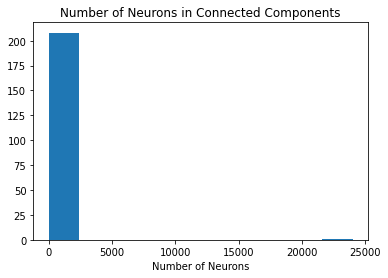

In [7]:
fig,ax = plt.subplots(1,1)
ax.hist(conn_comp_size)
ax.set_title("Number of Neurons in Connected Components")
ax.set_xlabel("Number of Neurons")
plt.show()

In [ ]:
"""
a lot of the connections are just self connections creating components of size 1

"""

In [8]:
# seeing that a lot is from self connections so filtering those out
non_self_connection_components = [k for k in conn_comp if len(k)>1]
non_self_connection_components_sizes = [len(k) for k in non_self_connection_components]
print(non_self_connection_components_sizes)

[24033, 2, 2, 2, 4, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2]


# Selecting the largest component

In [9]:
G_largest = G.subgraph(conn_comp[0])
node_names_largest_comp = np.array(G_largest.nodes())
node_names_largest_comp.shape

(24033,)

# shortest paths

In [ ]:
# finding the shortest path between two nodes
ex_node_1 = node_names_largest_comp[300]
ex_node_2 = node_names_largest_comp[600]
try:
    shortest_path = nx.shortest_path(G_largest,ex_node_1,ex_node_2)
    print(f"Shortest path between neuron {ex_node_1} and {ex_node_2}= {shortest_path}")
    
except:
    print("no path exists between neurons")

In [ ]:
# shortest path between groups of nodes
ex_node_group_1 = node_names_largest_comp[100:200]
ex_node_group_2 = node_names_largest_comp[400:500]

# to unfreeze the graph if an error about being frozen occured (just to make a copy)

#if directional then might get errors about no paths between pairs of nodes
G_largest = nx.Graph(G_largest)

shortest_path,start_node,end_nodexu.shortest_path_between_two_sets_of_nodes(G_largest,
                                           ex_node_group_1,
                                          ex_node_group_2)



# Degree Distribution

In [29]:
864691136286544067 == 864691136286544067

True

In [30]:
xu.get_node_degree(G_largest,864691136286544067)

10

In [40]:
degree_dict = no_selflooped_graph.degree

In [41]:
degree_dict[864691136286544067]

2

In [42]:
no_selflooped_graph[864691136286544067]

AtlasView({864691135581608557: {'weight': 3776}, 864691136436404126: {'weight': 2892}})

In [34]:
undirectional_graph = nx.Graph(G_largest)
no_selflooped_graph = xu.remove_selfloops(undirectional_graph)
no_selflooped_graph

In [36]:
degree_distribution = np.array(xu.get_node_degree(no_selflooped_graph,node_names_largest_comp))

In [37]:
degree_distribution_filtered = degree_distribution[degree_distribution<np.percentile(degree_distribution,99.5)]

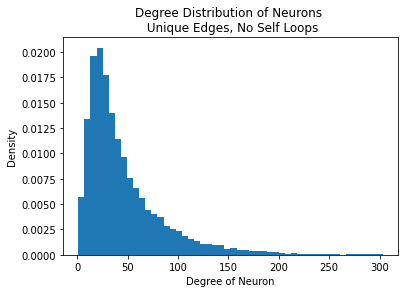

In [45]:
fig,ax = plt.subplots(1,1)
ax.hist(degree_distribution_filtered,bins=50,density=True)
ax.set_title("Degree Distribution of Neurons \n Unique Edges, No Self Loops")
ax.set_xlabel("Degree of Neuron")
ax.set_ylabel("Density")
plt.show()

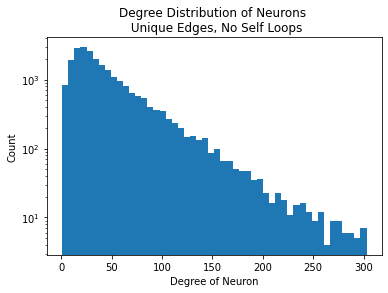

In [46]:
fig,ax = plt.subplots(1,1)
ax.hist(degree_distribution_filtered,bins=50,density=False)
ax.set_title("Degree Distribution of Neurons \n Unique Edges, No Self Loops")
ax.set_xlabel("Degree of Neuron")
ax.set_ylabel("Count")
ax.set_yscale("log")
plt.show()

# Then there are many functions of networkx functions to analyze the graph

In [ ]:
#this can take a little bit to compute
nx.average_shortest_path_length(G_largest)

# See More Networkx_Stats for more statistics